# Intro to DeepLearning algorithm 
## Getting images

### Step 1 - get api key 
* https://www.microsoft.com/en-us/maps/create-a-bing-maps-key
* sign in 
* generate api key 

### Step 2 - do the following

In [1]:
from DeepPoolAI import AerialImage

In [2]:
# Your Bing Maps Api key Here
# for example from file listed in .gitignore
f = open('key', 'r')
key = f.read()

In [31]:
ai = AerialImage(key = key,zoomLevel=18, height=500, width=500)

Given latitude and longitude in degrees, and the level of detail, the pixel XY coordinates can be calculated as follows:

sinLatitude = sin(latitude * pi/180)

pixelX = ((longitude + 180) / 360) * 256 * 2 level

pixelY = (0.5 – log((1 + sinLatitude) / (1 – sinLatitude)) / (4 * pi)) * 256 * 2 level

In [56]:
import math
latitude = 36.2806
longitude = -115.1626
level = 18
sinLatitude = math.sin(latitude * math.pi/180)

pixelX = ((longitude + 180) / 360) * 256 * (2^(level))
pixelY = (0.5 - math.log((1 + sinLatitude) / (1 - sinLatitude)) / (4 * math.pi)) * 256 * (2^level)

In [58]:
pixelX, pixelY

(737.7055288888889, 1604.4873990810213)

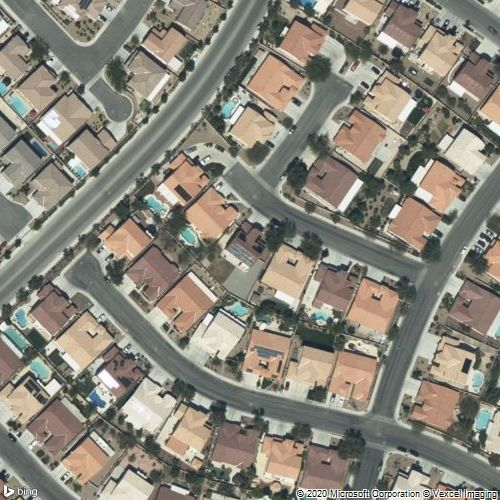

In [33]:
photo = ai.get_photo(lat=36.2806, long = -115.1626)
photo

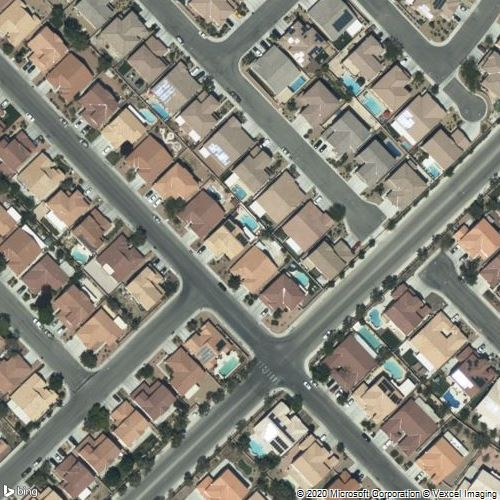

In [44]:
photo = ai.get_photo(lat=36.2806, long = -115.1645)
photo

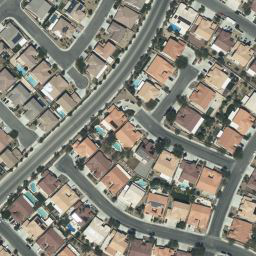

In [5]:
ai.get_square_photo(lat=36.280659, long = -115.162661)

In [66]:
EarthRadius = 6378137
MinLatitude = -85.05112878
MaxLatitude = 85.05112878
MinLongitude = -180
MaxLongitude = 180
  
#
# Clips a number to the specified minimum and maximum values.
def Clip(n, minValue, maxValue):
    return Math.Min(Math.Max(n, minValue), maxValue)  

#
#Determines the map width and height (in pixels) at a specified level  
#of detail.  
#
#"levelOfDetail" - Level of detail, from 1 (lowest detail) to 23 (highest detail).    
#The map width and height in pixels.
def MapSize(levelOfDetail):
    return uint(256 << levelOfDetail)    


  
# Determines the ground resolution (in meters per pixel) at a specified  
# latitude and level of detail.  
#    
#  "latitude" - Latitude (in degrees) at which to measure the  
# ground resolution.    
#  "levelOfDetail" - Level of detail, from 1 (lowest detail)  
# to 23 (highest detail).    
#  The ground resolution, in meters per pixel.  

def GroundResolution(latitude, levelOfDetail):
    latitude = Clip(latitude, MinLatitude, MaxLatitude)    
    return math.cos(latitude * math.pi / 180) * 2 * math.pi * EarthRadius / MapSize(levelOfDetail)
  
    

#    
# Determines the map scale at a specified latitude, level of detail,  
# and screen resolution.  
#    
#  "latitude" - Latitude (in degrees) at which to measure the  
# map scale.    
#  "levelOfDetail" - Level of detail, from 1 (lowest detail)  
# to 23 (highest detail).    
#  "screenDpi" - Resolution of the screen, in dots per inch.    
#  The map scale, expressed as the denominator N of the ratio 1 : N.  
def MapScale(latitude, levelOfDetail, screenDpi):
    return GroundResolution(latitude, levelOfDetail) * screenDpi / 0.0254  
  
    
    
    
#    
# Converts a point from latitude/longitude WGS-84 coordinates (in degrees)  
# into pixel XY coordinates at a specified level of detail.  
#    
#  "latitude" - Latitude of the point, in degrees.    
#  "longitude" - Longitude of the point, in degrees.    
#  "levelOfDetail" - Level of detail, from 1 (lowest detail)  
# to 23 (highest detail).    
#  "pixelX" - Output parameter receiving the X coordinate in pixels.    
#  "pixelY" - Output parameter receiving the Y coordinate in pixels.    
def LatLongToPixelXY(latitude, longitude, levelOfDetail):

    latitude = Clip(latitude, MinLatitude, MaxLatitude) 
    longitude = Clip(longitude, MinLongitude, MaxLongitude)

    x = (longitude + 180) / 360
    sinLatitude = math.Sin(latitude * math.PI / 180)
    y = 0.5 - math.Log((1 + sinLatitude) / (1 - sinLatitude)) / (4 * math.PI)
    mapSize = MapSize(levelOfDetail)

    pixelX = int(Clip(x * mapSize + 0.5, 0, mapSize - 1))
    pixelY = int(Clip(y * mapSize + 0.5, 0, mapSize - 1))
    
    return pixelX, pixelY

  
#    
# Converts a pixel from pixel XY coordinates at a specified level of detail  
# into latitude/longitude WGS-84 coordinates (in degrees).  
#    
#  "pixelX" - X coordinate of the point, in pixels.    
#  "pixelY" - Y coordinates of the point, in pixels.    
#  "levelOfDetail" - Level of detail, from 1 (lowest detail)  
# to 23 (highest detail).    
#  "latitude" - Output parameter receiving the latitude in degrees.    
#  "longitude" - Output parameter receiving the longitude in degrees.    
def PixelXYToLatLong(pixelX, pixelY, levelOfDetai):
    mapSize = MapSize(levelOfDetail)    
    x = (Clip(pixelX, 0, mapSize - 1) / mapSize) - 0.5    
    y = 0.5 - (Clip(pixelY, 0, mapSize - 1) / mapSize)    

    latitude = 90 - 360 * math.atan(math.exp(-y * 2 * math.pi)) / math.pi    
    longitude = 360 * x    
 
    return latitude, longitude
  
    
#    
# Converts pixel XY coordinates into tile XY coordinates of the tile containing  
# the specified pixel.  
#    
#  "pixelX" - Pixel X coordinate.    
#  "pixelY" - Pixel Y coordinate.    
#  "tileX" - Output parameter receiving the tile X coordinate.    
#  "tileY" - Output parameter receiving the tile Y coordinate.    
def PixelXYToTileXY(pixelX, pixelY): 
    tileX = pixelX / 256    
    tileY = pixelY / 256    
    
    return tileX, tileY

  
#    
# Converts tile XY coordinates into pixel XY coordinates of the upper-left pixel  
# of the specified tile.  
#    
#  "tileX" - Tile X coordinate.    
#  "tileY" - Tile Y coordinate.    
#  "pixelX" - Output parameter receiving the pixel X coordinate.    
#  "pixelY" - Output parameter receiving the pixel Y coordinate.    
def TileXYToPixelXY(tileX, tileY):
    pixelX = tileX * 256    
    pixelY = tileY * 256    

    return pixelX, pixelY
  
  

  
"""  
#    
# Converts tile XY coordinates into a QuadKey at a specified level of detail.  
#    
#  "tileX" - Tile X coordinate.    
#  "tileY" - Tile Y coordinate.    
#  "levelOfDetail" - Level of detail, from 1 (lowest detail)  
# to 23 (highest detail).    
#  A string containing the QuadKey.  
def TileXYToQuadKey(tileX, tileY, levelOfDetail):
    StringBuilder quadKey = new StringBuilder()    
    for (i = levelOfDetail   i  -  0   i--)  
    {  
        char digit = '0'    
        mask = 1 << (i - 1)    
        if ((tileX & mask) != 0)  
        {  
            digit++    
        }  
        if ((tileY & mask) != 0)  
        {  
            digit++    
            digit++    
        }  
        quadKey.Append(digit)    
    }  
    return quadKey.ToString()
  
#    
# Converts a QuadKey into tile XY coordinates.  
#    
#  "quadKey" - QuadKey of the tile.    
#  "tileX" - Output parameter receiving the tile X coordinate.    
#  "tileY" - Output parameter receiving the tile Y coordinate.    
#  "levelOfDetail" - Output parameter receiving the level of detail.    
def QuadKeyToTileXY(string quadKey, out tileX, out tileY, out levelOfDetail):
    tileX = tileY = 0    
    levelOfDetail = quadKey.Length    
    for (i = levelOfDetail   i  -  0   i--)  
    {  
        mask = 1 << (i - 1)    
        switch (quadKey[levelOfDetail - i])  
        {  
            case '0':  
                break    
            case '1':  
                tileX |= mask    
                break    
            case '2':  
                tileY |= mask    
                break    
            case '3':  
                tileX |= mask    
                tileY |= mask    
                break    
            default:  
                throw new ArgumentException("Invalid QuadKey digit sequence.")    
        }  
    }  
}  
"""